{'RoBERTa-large': array([7.741     , 5.362     , 5.083     , 1.49102617]), 'BERT-base': array([2.75      , 1.908     , 1.86      , 0.52439484]), 'DistilBERT-base': array([1.485     , 0.962     , 1.003     , 0.35767765]), 'ALBERT-base': array([2.458     , 1.937     , 1.951     , 0.16904913]), 'LLAMA': array([78.        , 25.889     , 14.97540625])}
[<matplotlib.patches.Rectangle object at 0x7f2b5334fac0>, <matplotlib.patches.Rectangle object at 0x7f2b5334f910>, <matplotlib.patches.Rectangle object at 0x7f2b5334fee0>, <matplotlib.patches.Rectangle object at 0x7f2b5334fa90>, <matplotlib.patches.Rectangle object at 0x7f2b53290dc0>]


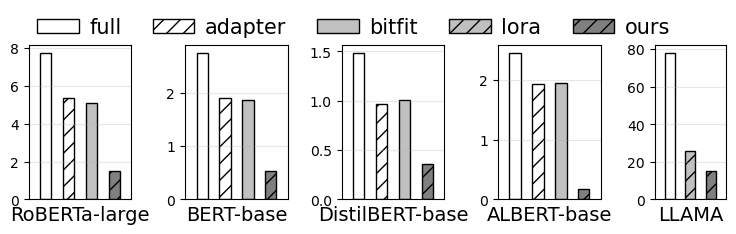

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

# peak memory
# ['full', 'adapter', 'bitfit', 'inference']
# {"BERT-large", "BERT-base", "DistilBERT-base", "ALBERT-base"}
memory = {"RoBERTa-large": np.array([7.741, 5.362, 5.083, 1.490]),
 "BERT-base": np.array([2.750, 1.908, 1.860, 0.524]),
 "DistilBERT-base": np.array([1.485, 0.962, 1.003, 0.356]),
 "ALBERT-base": np.array([2.458, 1.937, 1.951, 0.169]),
 "LLAMA": np.array([78, 25.889, 14.959])}

trainable_params = {"RoBERTa-large": 275460*4/1024/1024/1024,
 "BERT-base": 105988*4/1024/1024/1024,
 "DistilBERT-base": 450340*4/1024/1024/1024,
 "ALBERT-base": 13188*4/1024/1024/1024,
 "LLAMA": 4.2*4/1024}

for k in memory:
   memory[k][-1]+= trainable_params[k]
print(memory)

fig_output_path = "../"

def plot_memory(model):
    """
        todo
    """
    label_font_conf = {
        # "weight": "bold",
        "size": "14"
    }
    bar_confs = {
        "color": ["white", "white", "silver", "grey"],
        "linewidth": 1,
        "hatch": ["", "//", "", "//"],
        "edgecolor": "black",
    }


    figure_mosaic = """
    AAAA.BBBB.CCCC.DDDD.EEE
    """
    fig, axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(9, 2), dpi=100)
    bar_width = 0.03

    x = [0.1, 0.1+bar_width*2, 0.1+bar_width*4, 0.1+bar_width*6]

    xlabels = ["RoBERTa-large", "BERT-base", "DistilBERT-base", "ALBERT-base", "LLAMA"]
    xlabels_fig = ["RoBERTa-large", "BERT-base", "DistilBERT-base", "ALBERT-base", "LLAMA"]
    ax = [axes["A"], axes["B"], axes["C"], axes["D"], axes["E"]]

    for i in range(len(axes)-1):
        ax[i].set_xlabel(xlabels_fig[i], **label_font_conf)
        ax[i].set_xticks([])
        fps = memory[xlabels[i]]
        ax[i].bar(x, fps, width=bar_width, **bar_confs)

        ax[i].grid(axis="y", alpha=0.3)
        ax[i].set_xlim(min(x)-bar_width*1.5, max(x)+bar_width*1.5)
    
    # for LLAMA
    i = i+1
    x = [0.1, 0.1+bar_width*2, 0.1+bar_width*4]
    bar_confs = {
        "color": ["white", "silver", "grey"],
        "linewidth": 1,
        "hatch": ["", "//", "//"],
        "edgecolor": "black",
    }

    ax[i].set_xlabel(xlabels_fig[i], **label_font_conf)
    ax[i].set_xticks([])
    fps = memory[xlabels[i]]
    ax[i].bar(x, fps, width=bar_width, **bar_confs)

    ax[i].grid(axis="y", alpha=0.3)
    ax[i].set_xlim(min(x)-bar_width*1.5, max(x)+bar_width*1.5)
    
    # ax[0].set_yscale('log')
    # ax[1].set_yscale('log')
    # ax[2].set_yscale('log')
    # ax[0].axhline(8, color='r', linestyle='--')
    # ax[0].text(0.15, 8.1, 'OOM', fontsize=12, color='r')
    # ax[-1].axhline(8, color='r', linestyle='--')
    # ax[-1].text(0.1, 8.5, 'OOM', fontsize=12, color='r')
    # ax[0].set_ylabel("Memory (GB)", **label_font_conf)
    # ax[1].set_ylabel("Latency (s)", **label_font_conf)
    # ax[2].set_ylabel("Accuracy", **label_font_conf)
    # ax[3].set_ylabel("Accuracy", **label_font_conf)
    # https://matplotlib.org/stable/api/container_api.html#module-matplotlib.container
    bars = ax[0].containers[0].get_children()
    bars_llama = ax[-1].containers[0].get_children()[-2]
    bars.insert(3, bars_llama)
    print(bars)
    # print(bars_llama)
    labels = ['Full-FT', 'Adapter', 'Bitfit', 'LoRA', 'ours']
    ax[0].legend(bars, labels, ncol=5, loc="lower left", bbox_to_anchor=(-0.1, 0.93),frameon=False,fontsize=15,columnspacing = 1.5,handletextpad=0.5)

    plt.subplots_adjust(wspace=2.5)

    # plt.savefig(os.path.join(fig_output_path, "design-pitfall-memory.pdf"), bbox_inches="tight")
    plt.show()


if __name__ == '__main__':
    plot_memory("")


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

# peak memory
# ['full', 'adapter', 'bitfit', 'inference']
# {"BERT-large", "BERT-base", "DistilBERT-base", "ALBERT-base"}
memory = {"RoBERTa-large": np.array([7.741, 5.362, 5.083, 1.490]),
 "BERT-base": np.array([2.750, 1.908, 1.860, 0.524]),
 "DistilBERT-base": np.array([1.485, 0.962, 1.003, 0.356]),
 "ALBERT-base": np.array([2.458, 1.937, 1.951, 0.169]),
 "LLAMA": np.array([78, 25.889, 14.959])}

trainable_params = {"RoBERTa-large": 275460*4/1024/1024/1024,
 "BERT-base": 105988*4/1024/1024/1024,
 "DistilBERT-base": 450340*4/1024/1024/1024,
 "ALBERT-base": 13188*4/1024/1024/1024,
 "LLAMA": 4.2*4/1024}

for k in memory:
   memory[k][-1]+= trainable_params[k]
print(memory)

fig_output_path = "../"

memory_calculate = []

for model in memory:
   y = memory[model]
   x = ['full', 'adapter', 'bitfit', 'ours']
   if model == 'LLAMA':
      x = ['full', 'lora', 'ours']
   # plt.plot(range(len(x)), y, color='black',linewidth=3)
   # plt.scatter(range(len(x)), y, color='black',linewidth=3)
   # plt.title(f"memory useage of {model}",fontsize=20)
   # plt.ylabel('memory useage (GB)',fontsize=20)
   # plt.xlabel('method',fontsize=20)
   # plt.xticks(list(range(len(x))),x,fontsize=15)
   # plt.yticks(fontsize=15)
   # plt.savefig(f"/data/wyz/ForwardFL-Latex/figs/eval-memory-{model}.pdf", bbox_inches="tight")
   # plt.show()
   if model != 'LLAMA':
      memory_calculate.append((y[0]-min(y[1],y[2]))/y[0])
print(memory_calculate)
print(np.mean(memory_calculate))

{'RoBERTa-large': array([7.741     , 5.362     , 5.083     , 1.49102617]), 'BERT-base': array([2.75      , 1.908     , 1.86      , 0.52439484]), 'DistilBERT-base': array([1.485     , 0.962     , 1.003     , 0.35767765]), 'ALBERT-base': array([2.458     , 1.937     , 1.951     , 0.16904913]), 'LLAMA': array([78.        , 25.889     , 14.97540625])}
[0.3433664901175558, 0.3236363636363636, 0.3521885521885523, 0.21196094385679418]
0.3077880874498165


{'RoBERTa-large': array([7.741     , 5.362     , 5.083     , 1.49102617]), 'BERT-base': array([2.75      , 1.908     , 1.86      , 0.52439484]), 'DistilBERT-base': array([1.485     , 0.962     , 1.003     , 0.35767765]), 'ALBERT-base': array([2.458     , 1.937     , 1.951     , 0.16904913]), 'LLAMA': array([78.        , 25.889     , 14.97540625])}


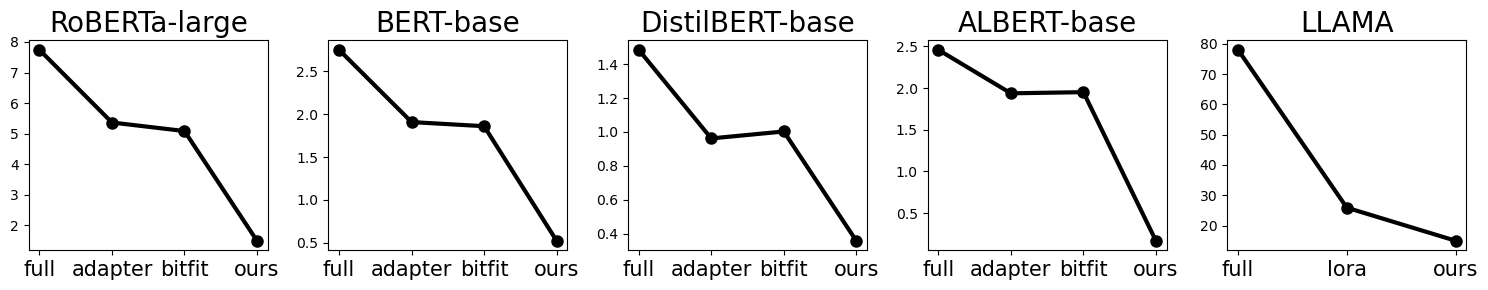

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import os

# peak memory
# ['full', 'adapter', 'bitfit', 'inference']
# {"BERT-large", "BERT-base", "DistilBERT-base", "ALBERT-base"}
memory = {"RoBERTa-large": np.array([7.741, 5.362, 5.083, 1.490]),
 "BERT-base": np.array([2.750, 1.908, 1.860, 0.524]),
 "DistilBERT-base": np.array([1.485, 0.962, 1.003, 0.356]),
 "ALBERT-base": np.array([2.458, 1.937, 1.951, 0.169]),
 "LLAMA": np.array([78, 25.889, 14.959])}

trainable_params = {"RoBERTa-large": 275460*4/1024/1024/1024,
 "BERT-base": 105988*4/1024/1024/1024,
 "DistilBERT-base": 450340*4/1024/1024/1024,
 "ALBERT-base": 13188*4/1024/1024/1024,
 "LLAMA": 4.2*4/1024}

for k in memory:
   memory[k][-1]+= trainable_params[k]
print(memory)

fig_output_path = "../"

fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i,model in enumerate(memory):
   y = memory[model]
   x = ['full', 'adapter', 'bitfit', 'ours']
   if model == 'LLAMA':
      x = ['full', 'lora', 'ours']
   axs[i].plot(range(len(x)), y, color='black',linewidth=3)
   axs[i].scatter(range(len(x)), y, color='black',linewidth=3)
   axs[i].set_title(f"{model}",fontsize=20)
#    axs[i].set_ylabel('memory useage (GB)',fontsize=)
#    axs[i].set_xlabel('method',fontsize=20)
   axs[i].set_xticks(list(range(len(x))),x,fontsize=15)
#    axs[i].set_yticks(fontsize=15)
   
plt.tight_layout()
plt.savefig(f"/data/wyz/ForwardFL-Latex/figs/eval-memory-useage.pdf", bbox_inches="tight")
plt.show()
